# Linguistic Markers of Depression using Tweets - Zahra Shah

## Description

According to Pew Research Center, 72 % of the public uses some sort of social media and posts thoughts, tweets, statuses etc. These pieces of writings can be an indicator of someone’s mental health. For this project, I am utilizing a dataset of 31,000 tweets taken from popular social media website Twitter. The dataset inludes the texts for 31000 tweets, along with the target labels with 1 denoting sad/depressed tweets and 0 denoting non-depressed tweets. It is important to note that I am not interested in whether a tweet has a positive or negative connotation. Thus the tweets that have been labelled 0 can have either connotation. I am primarily interested in whether a tweet shows signs of depression/sadness or not. 

I am trying to understand the linguistic markers of depression using social media tweets. My belief is that many people post about their internal state of mind (consciously or subconsciously) and that can offer us an insight into their mental health and prevent death by suicides. In this project, I will be implementing a simplified version of that. The first step has been processing the text data into one that a machine learning algorithm can use. In that regard, I first tokenized by data using the Natural Language Toolkit in python. Once I had the tokens, I used the POS tagging module to get a better understanding of words in their context. I did this for two reasons. First, having tags can provide important contextual differences in sentences sentence where the same word is used. For example, the sentences "The horror movie was terrifying" and "The thought of being alone terrifies me." both use some form of terrify but one is an adjective and the other a verb, so the context changes. Secondly, my final analysis will use vectorized data in which its helpful if I know the tags because then I can correctly normalize the data using python's lemmatizer, which greatly reduces the total vocabulary for analysis. I have also reduced some common words using stopwords. Thus, I finally have my df column as 'Lemmatized_tokens'.

To convert this text data, I plan to use vectorization to get it in a vector form. I will be using two ways to do that. One will be Bag of Words using CountVectorizer, where each word will have a vector noting the frequency of each word in the total vocabulary. I obviously dont want these vectors to be very long, so I may cap the number to the 1000 most common words or more depending on how my model fares. However, this way each word will have equal weight so that is a limitation. The other approach that I will try is the TF-IDF method using Tfidfvectorizer. This method puts a higher weightage on words that are not very frequent in the overall data but are frequent in the tweet itself. 

Once I have the final vectorized data (and I will use each approach and see which one works best), I will train a machine model on this data and then test it. I want to split my data in the 50:50 ratio and I will be using three machine models and then reporting on the best one. My first model will be a Logistic Regressor(with two different types of vectorization). My second  model will be a LSTM RNN. using keras. Finally, I will also be using a Bi-drectional LSTM model.

To report my results, I will be reporting the accuracy rate of my machine models in the test set for each of my models. Anything above an 80 % will be considered a good start and my metric of success will be an accuracy rate of 90 % or above.

In [1]:
import keras

### Loading dataset and seeing features

In [2]:
#load the dataset
import pandas as pd
df = pd.read_csv("Depression.csv")
df

,Tweets,Target
0,damn taking this personality quiz and realizin...,1
1,remember experiencing as kid what now realize ...,1
2,damn louis really did pull me out of my depres...,1
3,my depression is really kicking my ass right n...,1
4,feel like my night is going bad family calling...,1
...,...,...
30995,dnc puppet is claiming she wants to put god am...,0
30996,as soon as my election job is over ll be back ...,0
30997,the moral of the story is you gotta get it fir...,0
30998,got through my hardest week this semester and ...,0


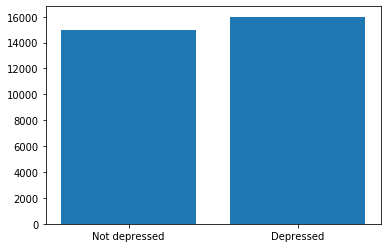

In [3]:
import numpy as np
import matplotlib.pyplot as plt
labels = df['Target']
counts = np.unique(labels, return_counts=True)
label = ['Not depressed', 'Depressed']
plt.bar(label,counts[1])
plt.show()




The number of depressed tweets to non-depresssed tweets are very similar, so they have an almost equal ratio in this data set.

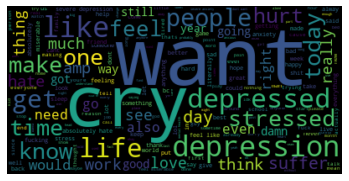

In [4]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = set(stopwords.words('english'))
textt = " ".join(review for review in df.Tweets)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

Word cloud for depressed tweets


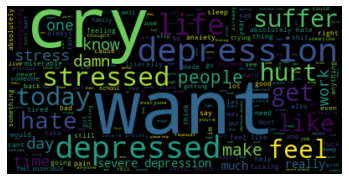

Word clouds for non-depressed tweets


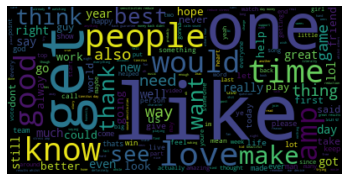

In [5]:
#I will split the tweets in the respective categories, and see how depressed tweets compare to non-depressed
depressed = df[df['Target'] == 1]
non_depressed = df[df['Target'] == 0]

#I will create wordclouds for both
print("Word cloud for depressed tweets")
text1 = " ".join(tweet for tweet in depressed.Tweets)
wordcloud = WordCloud(stopwords=stopwords).generate(text1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

print("Word clouds for non-depressed tweets")
text2 = " ".join(tweet for tweet in non_depressed.Tweets)
wordcloud = WordCloud(stopwords=stopwords).generate(text2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

### Data processing

#### Tokenization

In [6]:
#first i will tokenize the tweets
from nltk.tokenize import word_tokenize
text = df['Tweets']
df['Tokens'] = text.apply(word_tokenize)
df.head()

,Tweets,Target,Tokens
0,damn taking this personality quiz and realizin...,1,"[damn, taking, this, personality, quiz, and, r..."
1,remember experiencing as kid what now realize ...,1,"[remember, experiencing, as, kid, what, now, r..."
2,damn louis really did pull me out of my depres...,1,"[damn, louis, really, did, pull, me, out, of, ..."
3,my depression is really kicking my ass right n...,1,"[my, depression, is, really, kicking, my, ass,..."
4,feel like my night is going bad family calling...,1,"[feel, like, my, night, is, going, bad, family..."


Here, the tweets have been tokenized, so each tweet has been seperated into its component words

#### POS tagging

In [7]:
#POS tagging for the tokens
df['Token_tags'] = df['Tokens'].apply(lambda x: [nltk.pos_tag(x)])


In [8]:
df['Token_tags'][3]

[[('my', 'PRP$'),
  ('depression', 'NN'),
  ('is', 'VBZ'),
  ('really', 'RB'),
  ('kicking', 'VBG'),
  ('my', 'PRP$'),
  ('ass', 'NN'),
  ('right', 'RB'),
  ('now', 'RB'),
  ('so', 'RB'),
  ('damn', 'RB'),
  ('tired', 'JJ')]]

With POS tagging, we can see what form the word has in the sentence. This will help us later on, when we are trying to do lemmatization.

#### Removal of stopwords

In [9]:
#removing stopwords

df['Clean_tagged_tokens'] = df['Token_tags'].apply(lambda x: [item for item in x[0] if item[0] not in stopwords])

    

I have removed some common stopwords from the tagged tokens so reduce the number of irrelevant words. Notice that I did this after tagging the words. The reason is even though stopwords do not play a big role in conveying sentiments, they do have a role in completely understanding the forms of a word. Once I had tagged my words, I removed the stopwords.

#### Normalization using lemma

In [10]:
#I am now going to normalize the cleaned tagged tokens to make vectorization easier for me
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

def get_wordnet_pos(tag):
    """Map POS tag to first character lemmatize() accepts"""
    tag = tag[1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()

df['Lemmatized_tokens'] = df['Clean_tagged_tokens'].apply(lambda x: [lemmatizer.lemmatize(w[0],get_wordnet_pos(w)) for w in x])

Now I will seperate the data into a training and test set. I will keep 50 % of the data for testing and 50 % for training.

In [11]:
X = df["Tweets"].values
y = df["Target"].values
docs = np.array(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1)

I will now find the best parameters using GridSearch for my logistic regression. This will help me understand what whether to use l1 or l2 regularization and what penalty to use. 

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

stop = stopwords.words('english')
porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

tfidf = TfidfVectorizer(strip_accents=None,
                           lowercase=False,
                           preprocessor=None)

param_grid = [{'vect__ngram_range': [(1,1)],'vect__tokenizer': [tokenizer,tokenizer_porter],
            'clf__penalty': ['l1', 'l2'],
            'clf__C': [1.0, 10.0, 100.0]},
            {'vect__ngram_range': [(1,1)],
             'vect__tokenizer': [tokenizer,tokenizer_porter],
             'vect__use_idf':[False],
             'vect__norm':[None],
             'clf__penalty': ['l1', 'l2'],
             'clf__C': [1.0, 10.0, 100.0]}]
lr_tfidf = Pipeline([('vect', tfidf),('clf', LogisticRegression(random_state=0,solver='liblinear'))])
gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid, scoring='accuracy', cv=5, verbose=2,n_jobs=1)
gs_lr_tfidf.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] clf__C=1.0, clf__penalty=l1, vect__ngram_range=(1, 1), vect__tokenizer=<function tokenizer at 0x1a4f45cd40> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__C=1.0, clf__penalty=l1, vect__ngram_range=(1, 1), vect__tokenizer=<function tokenizer at 0x1a4f45cd40>, total=   0.4s
[CV] clf__C=1.0, clf__penalty=l1, vect__ngram_range=(1, 1), vect__tokenizer=<function tokenizer at 0x1a4f45cd40> 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  clf__C=1.0, clf__penalty=l1, vect__ngram_range=(1, 1), vect__tokenizer=<function tokenizer at 0x1a4f45cd40>, total=   0.3s
[CV] clf__C=1.0, clf__penalty=l1, vect__ngram_range=(1, 1), vect__tokenizer=<function tokenizer at 0x1a4f45cd40> 
[CV]  clf__C=1.0, clf__penalty=l1, vect__ngram_range=(1, 1), vect__tokenizer=<function tokenizer at 0x1a4f45cd40>, total=   0.3s
[CV] clf__C=1.0, clf__penalty=l1, vect__ngram_range=(1, 1), vect__tokenizer=<function tokenizer at 0x1a4f45cd40> 
[CV]  clf__C=1.0, clf__penalty=l1, vect__ngram_range=(1, 1), vect__tokenizer=<function tokenizer at 0x1a4f45cd40>, total=   0.3s
[CV] clf__C=1.0, clf__penalty=l1, vect__ngram_range=(1, 1), vect__tokenizer=<function tokenizer at 0x1a4f45cd40> 
[CV]  clf__C=1.0, clf__penalty=l1, vect__ngram_range=(1, 1), vect__tokenizer=<function tokenizer at 0x1a4f45cd40>, total=   0.4s
[CV] clf__C=1.0, clf__penalty=l1, vect__ngram_range=(1, 1), vect__tokenizer=<function tokenizer_porter at 0x646f2b290> 
[CV]  clf__C=1.0, clf_

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  7.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=False,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [13]:
print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)
print('CV Accuracy: %.3f'% gs_lr_tfidf.best_score_)
clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f'% clf.score(X_test, y_test))

Best parameter set: {'clf__C': 1.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__norm': None, 'vect__tokenizer': <function tokenizer at 0x1a4f45cd40>, 'vect__use_idf': False} 
CV Accuracy: 0.996
Test Accuracy: 0.996


As we can see, the best result is done using l2 regularization, with a penalty strength of C=1.0. Stemming is also better than just tokenization. We can see that our model's best accuray can be 0.996. Although we do not need to run logistic regression manually after the gridsearch, I want to see how much of a difference the two types of vectorizations make. So I will be creating a bag of words using CountVectorizer and a TFIDF bag using TfidfVectorizer and run logistic regressions on them manually. 

In the first steps of this project, I have already done most of the preprocessing of the texts, mainly tokenization, stemming and the removal of stop words. It is important to note that vectorization of texts using BoW or TFIDF models does not really preserve word order neither does word order matter in it. We could use n-gram but our gridsearch showed that 1-gram works best. Thus, tagging our text in our initial steps only served the function of efficiently stemming words. I will be using that processed text tokens and convert them again into sentences so that we can transform the sentences into vectors. 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

df['clean_text'] = df['Lemmatized_tokens'].apply(lambda x: ' '.join([word for word in x]))
count = CountVectorizer(max_features=1000)
docs = df["clean_text"].tolist()
bag = count.fit(docs)

tfidf = TfidfVectorizer(max_features=1000)
tfidbag = tfidf.fit(docs)

from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(docs, y, test_size = 0.5, random_state = 1)


Xt_train = tfidf.transform(X1_train)
Xt_test = tfidf.transform(X1_test)

BoW_train = count.transform(X1_train)
BoW_test = count.transform(X1_test)

#print(count.vocabulary_)

I kept the max number of words to 1000 because I did not want the the vectors to be very long. During my work, I found that increasing the words did not affect the accuracy as much so I kept them at 1000. 

### Trying out Bag of Words with a Logistic Regressor

In [15]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(penalty = 'l2', C=1.0, random_state=0,solver='liblinear')
lr1.fit(BoW_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
test_size = BoW_test.shape[0]
correct_lgrg = 0
for i in range(0, test_size):
    true_label = y_test[i]
    lgrg_prediction = lr1.predict(BoW_test[i])
    if lgrg_prediction == true_label:
        correct_lgrg += 1
accuracy_lgrg= correct_lgrg / test_size * 100
print("Logistic regression accuracy:",accuracy_lgrg)


Logistic regression accuracy: 99.65806451612903


Our logistic model offers a test accuracy on 99.66 % on the test data using the bag of words model and keeping the parameters as found in the grid search. 

### Trying out Logistic Regression with TFIDFVectorizer

In [17]:

lr2 = LogisticRegression(penalty = 'l2', C=1.0, random_state=0,solver='liblinear')
lr2.fit(Xt_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
Tfidf_score = lr2.score(Xt_test, y_test)
print("Tfidf Logistic model accuracy: ", Tfidf_score)

Tfidf Logistic model accuracy:  0.9942580645161291


With a tfidf logistic model, our accuracy is 99.4 % which is a little less than the bag of model but almost negligible. 

### Trying out RNN model

In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

tk = Tokenizer(lower=True)
Xr = df["Tweets"].values
y = df["Target"].values
tk.fit_on_texts(Xr)
X_seq = tk.texts_to_sequences(Xr)
X_pad = pad_sequences(X_seq, maxlen=300, padding='post')
print(y)
print(X_pad)


[1 1 1 ... 0 0 0]
[[  70  410   15 ...    0    0    0]
 [ 322 2013   43 ...    0    0    0]
 [  70 3132   63 ...    0    0    0]
 ...
 [   1 3155    5 ...    0    0    0]
 [ 115  174    4 ...    0    0    0]
 [ 517   75   51 ...    0    0    0]]


For the RNN model, I convert the text tokens into sequences and then pad the lengths because RNN model work best when the size of the vectors is the same. To do that, I pad the sequences (remove long sequences or add zero to the end (padding = post) to bring it to the max size, which I kept at 500. 

In [20]:
from sklearn.model_selection import train_test_split
X2_train, Xr_test, y2_train, y_test = train_test_split(X_pad, y, test_size = 0.25, random_state = 1)
Xr_train, X_valid, yr_train, y_valid = train_test_split(X2_train, y2_train, test_size =0.3, random_state =1)


Now the data is divided into a test set and a training set. The training set itself is divided into a validation set and training set. 

#### LSTM model

In [21]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
vocabulary_size = len(tk.word_counts.keys())+ 2
embedding_size = 20
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size))
model.add(LSTM(64))
model.add(Dense(1,activation='relu'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])


In [22]:
model.fit(Xr_train, yr_train,validation_data = (X_valid, y_valid),epochs = 5)

Epoch 1/5
509/509 [==============================] - 42s 82ms/step - loss: 0.7367 - accuracy: 0.5015 - val_loss: 0.6950 - val_accuracy: 0.4826
Epoch 2/5
509/509 [==============================] - 38s 74ms/step - loss: 0.6958 - accuracy: 0.5003 - val_loss: 0.6928 - val_accuracy: 0.5174
Epoch 3/5
509/509 [==============================] - 40s 78ms/step - loss: 0.6947 - accuracy: 0.5092 - val_loss: 0.6973 - val_accuracy: 0.4826
Epoch 4/5
509/509 [==============================] - 39s 77ms/step - loss: 0.6947 - accuracy: 0.4954 - val_loss: 0.6928 - val_accuracy: 0.5174
Epoch 5/5
509/509 [==============================] - 39s 76ms/step - loss: 0.6944 - accuracy: 0.5045 - val_loss: 0.6930 - val_accuracy: 0.5174


In [23]:
model.evaluate(Xr_test,y_test)

243/243 [==============================] - 4s 16ms/step - loss: 0.6918 - accuracy: 0.5262


[0.6918423175811768, 0.5261935591697693]

Our LSTM RNN model does not do as well as our logistic models. It may be because our sequences are too long. Next we will try a bi-directional LSTM model that the book uses for sentiment analysis. 

#### Bi-directional LSTM model

In [24]:
# bi-directional LSTM model taken from book
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense

embedding_dim = 20
vocab_size = len(tk.word_counts.keys()) + 2

tf.random.set_seed(1)

bi_lstm_model = tf.keras.Sequential([tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim,name='embed-layer'),
                                     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, name='lstm-layer'),name='bidir-lstm'),
                                     tf.keras.layers.Dense(64, activation='relu'),
                                     tf.keras.layers.Dense(1, activation='sigmoid')])

bi_lstm_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                       loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

history = bi_lstm_model.fit(Xr_train, yr_train, validation_data=(X_valid, y_valid),epochs=10)


Epoch 1/10
509/509 [==============================] - 57s 112ms/step - loss: 0.1307 - accuracy: 0.9455 - val_loss: 0.0204 - val_accuracy: 0.9938
Epoch 2/10
509/509 [==============================] - 56s 110ms/step - loss: 0.0075 - accuracy: 0.9983 - val_loss: 0.0192 - val_accuracy: 0.9948
Epoch 3/10
509/509 [==============================] - 56s 109ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0261 - val_accuracy: 0.9934
Epoch 4/10
509/509 [==============================] - 56s 109ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.0557 - val_accuracy: 0.9888
Epoch 5/10
509/509 [==============================] - 56s 109ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0240 - val_accuracy: 0.9940
Epoch 6/10
509/509 [==============================] - 56s 110ms/step - loss: 6.3579e-04 - accuracy: 0.9999 - val_loss: 0.0286 - val_accuracy: 0.9935
Epoch 7/10
509/509 [==============================] - 56s 110ms/step - loss: 6.9393e-05 - accuracy: 1.0000 - val_loss: 0.0305 

In [25]:
results = bi_lstm_model.evaluate(Xr_test, y_test)
print('Bi_LSTM model Acc.: {:.2f}%'.format(results[1]*100))

243/243 [==============================] - 5s 20ms/step - loss: 0.0290 - accuracy: 0.9952
Bi_LSTM model Acc.: 99.52%


The bidirectional LSTM model achieves a 99.52 % accuracy on our test set, which is very comparable to our logistic regression models.

## Results and Conclusion

### Model ---> Accuracy
###### Logistic regression with countvectorizer: 99.66 %
###### Logistic regression with tfidfvectorizer: 99.42 %
###### LSTM RNN: 69.50 %
###### Bi-directional LSTM: 99.52 %

Results show that standard logistic regression with count vectorization works best to classify our dataset of tweets marked as depressed or not. The Bi-directional LSTM also has comparable results but given the size of the datastet, and the fact that a logistic regression with bag of words works better, it is more time-efficient to use that. Thus the best model for this dataset has been logistic regression with a bag of words. Since the 99.96 % accuracy is on achieved on unseen test data, we did not suffer from overfitting. The results are a little counter-intuitive. I believed a sequential neural network would perform better on text analysis given the fact that word sequence and order has a lot to contribute to the overall sentiment behind a tweet. However, my results suggest otherwise in the context of understanding the linguistic markers of depression. It may be the case that the detection of emotions in texts may have more to do with the presence of certain words, rather than the overall meaning or sequence of words. As we saw in the word clouds in the beginning, depressed tweets seem to have words such as 'hate', 'cry', 'stress' etc whereas happy tweets dont. That may explain why our logistic model did the best. The high accuracy may also be because of the big size of the dataset. In any case, the models should be tested on more unseeen data. 

Future directions: This model is a very basic model used to mark tweets as depressed or not, however the idea behind it can be expanded and if expanded in the right way, I think it can do a lot to understand and help people suffering from depression. Big social medias platforms can perform such analysis of their users' tweets and provide regular feedback or automated wellness checks which may prompt people to seek professional help or reach out. Just an idea!!